<a href="https://colab.research.google.com/github/mintra-tippayaratsontorn/Multivariate/blob/main/Exam01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exam 01

# Pizza

In [1]:
import pandas as pd

In [4]:
pizza = pd.read_csv('/content/Pizza.csv')
pizza.head(10)

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67
5,A,14075,31.14,20.23,42.31,4.92,1.65,1.40,4.67
6,A,14082,31.21,20.97,41.34,4.71,1.58,1.77,4.63
7,A,14097,28.76,21.41,41.60,5.28,1.75,2.95,4.72
8,A,14117,28.22,20.48,45.10,5.02,1.71,1.18,4.93
9,A,14133,27.72,21.19,45.29,5.16,1.66,0.64,4.95


In [5]:
pizza.shape  #ตรวจสอบขนาดของข้อมูลว่ามี data กี่ตัว และมีกี่ dimensions

(300, 9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffa6ee7cd10>,
      dtype=object)

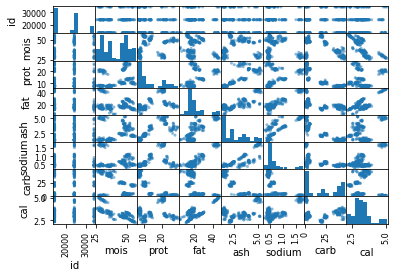

In [6]:
pd.plotting.scatter_matrix(pizza)  #plot scatter matrix เพื่อดูการกระจายของข้อมูล

In [10]:
pizza1 = pizza.iloc[:,2:]  #เลือกข้อมูลที่นำมาplotกราฟได้
pizza1.head()

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67


### ตรวจสอบว่าระหว่าง columns มี correlation กันมากน้อยแค่ไหน ด้วย numpy

In [9]:
import numpy as np

In [11]:
corr = np.corrcoef(pizza1.to_numpy().T)

In [12]:
corr.shape

(7, 7)

In [13]:
corr

array([[ 1.        ,  0.36024768, -0.17131821,  0.26555552, -0.1022789 ,
        -0.59180165, -0.76444054],
       [ 0.36024768,  1.        ,  0.49800167,  0.8238437 ,  0.42912952,
        -0.85354226,  0.0702581 ],
       [-0.17131821,  0.49800167,  1.        ,  0.79163396,  0.93332522,
        -0.64023817,  0.7645671 ],
       [ 0.26555552,  0.8238437 ,  0.79163396,  1.        ,  0.80812215,
        -0.89898837,  0.32646845],
       [-0.1022789 ,  0.42912952,  0.93332522,  0.80812215,  1.        ,
        -0.62017634,  0.6719575 ],
       [-0.59180165, -0.85354226, -0.64023817, -0.89898837, -0.62017634,
         1.        , -0.02348458],
       [-0.76444054,  0.0702581 ,  0.7645671 ,  0.32646845,  0.6719575 ,
        -0.02348458,  1.        ]])

###หา correlation ที่ซ้ำกัน

In [15]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
      if (i !=j) and (corr[i,j] == 1.):
        print(f'row = {i} colum = {j} corrcoef = {corr[i,j]}')

#รันข้อมูลแต่ไม่มีข้อมูลออกมา (คือข้อมูลไม่มีตัวที่ซ้ำกัน จึงไม่ต้องตัดข้อมูลออก)

### สร้างตารางใหม่
ลบ column ของข้อมูลที่ไม่ใช้ในการ plot กราฟออก

In [41]:
pizza_dropped1 = pizza.drop(['brand','id'],axis=1)  
pizza_dropped1

,mois,prot,fat,ash,sodium,carb,cal
0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...
295,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,47.60,10.43,15.18,2.32,0.56,24.47,2.76


In [42]:
pizza_dropped2 = pizza.drop(['id'],axis=1)  
pizza_dropped2

,brand,mois,prot,fat,ash,sodium,carb,cal
0,A,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...
295,J,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,J,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,J,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,J,47.60,10.43,15.18,2.32,0.56,24.47,2.76


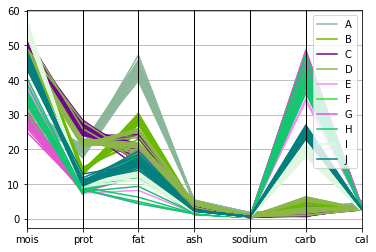

In [43]:
pd.plotting.parallel_coordinates(pizza_dropped2,'brand',cols=['mois','prot','fat','ash','sodium','carb','cal'])

### ทำ PCA เพื่อลดจำนวณ Dimentsion ของข้อมูล

In [44]:
from sklearn.decomposition import PCA

In [45]:
pca = PCA(n_components=2)

In [48]:
new_pca = pca.fit_transform(pizza_dropped1.to_numpy())
new_pca

array([[-2.49517479e+01,  2.68116678e+01],
       [-2.46119758e+01,  2.56595634e+01],
       [-2.49384190e+01,  2.69305710e+01],
       [-2.43255609e+01,  2.35235671e+01],
       [-2.38660483e+01,  2.26528128e+01],
       [-2.42716473e+01,  2.25496261e+01],
       [-2.38806695e+01,  2.18852969e+01],
       [-2.23894923e+01,  2.39358506e+01],
       [-2.45074215e+01,  2.66033180e+01],
       [-2.50928469e+01,  2.71508163e+01],
       [-2.48185674e+01,  2.76159021e+01],
       [-2.39395254e+01,  2.75274080e+01],
       [-2.44496724e+01,  2.62221990e+01],
       [-2.28480039e+01,  2.27702098e+01],
       [-2.42812192e+01,  2.25656557e+01],
       [-2.38786302e+01,  2.39995991e+01],
       [-2.32390338e+01,  1.96576785e+01],
       [-2.36081213e+01,  1.88694931e+01],
       [-2.34833228e+01,  2.08403006e+01],
       [-2.30861647e+01,  2.25687679e+01],
       [-2.44317537e+01,  2.88343106e+01],
       [-2.39812139e+01,  2.72251577e+01],
       [-2.43513670e+01,  2.27327854e+01],
       [-2.

In [49]:
new_pca.shape

(300, 2)

In [52]:
brand = set(pizza['brand'])  #มี brand ไหนบ้าง
brand

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'}

##สร้าง Dictionary เพื่อแทนค่าที่เป็น text ให้เป็นตัวเลข เพื่อจะได้ plot สีได้

###สร้าง color list

In [53]:
brand_l = list(brand)  # แบ่งเป็นlist
brand_l.sort()  # การเรียงค่าสมาชิกจากน้อยไปมาก
color_list = {}
num = 0
for each_fg in brand_l:
    if each_fg not in color_list:
        color_list[each_fg] = num
        num += 1

In [54]:
color_list

{'A': 0,
 'B': 1,
 'C': 2,
 'D': 3,
 'E': 4,
 'F': 5,
 'G': 6,
 'H': 7,
 'I': 8,
 'J': 9}

In [55]:
pizza2 = pizza_dropped2.replace(color_list)
pizza2

,brand,mois,prot,fat,ash,sodium,carb,cal
0,0,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,0,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,0,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,0,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,0,30.49,21.28,41.65,4.82,1.64,1.76,4.67
...,...,...,...,...,...,...,...,...
295,9,44.91,11.07,17.00,2.49,0.66,25.36,2.91
296,9,43.15,11.79,18.46,2.43,0.67,24.17,3.10
297,9,44.55,11.01,16.03,2.43,0.64,25.98,2.92
298,9,47.60,10.43,15.18,2.32,0.56,24.47,2.76


### Plot Scatter

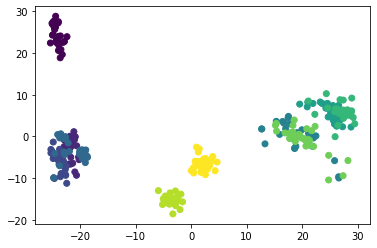

In [56]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = pizza2['brand'])  #plot ออกมาแล้วมีข้อมูลทับกันอยู่

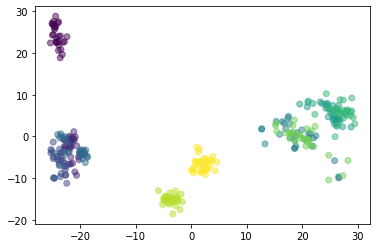

In [58]:
plt.scatter(new_pca[:,0],new_pca[:,1],c = pizza2['brand'],alpha=0.5)  #ทำให้ดูข้อมูลได้ง่ายขึ้น โดยalpha(ความโปร่งใส)

### เปรียบเทียบ brand -> D และ I

In [60]:
DI = pizza2[(pizza2['brand']==3) | (pizza2['brand']==8)]
DI

,brand,mois,prot,fat,ash,sodium,carb,cal
87,3,46.64,21.38,24.96,4.60,0.77,2.42,3.20
88,3,45.93,21.60,25.87,4.51,0.73,2.09,3.28
89,3,47.60,22.07,21.13,4.07,0.72,5.13,2.99
90,3,47.61,22.44,19.61,4.06,0.60,6.28,2.91
91,3,46.91,21.79,21.17,4.06,0.76,6.07,3.02
...,...,...,...,...,...,...,...,...
263,8,57.22,9.66,10.95,2.04,0.47,20.13,2.18
264,8,54.80,10.57,13.42,2.08,0.50,19.13,2.40
265,8,54.17,10.13,13.25,2.07,0.46,20.38,2.41
266,8,53.57,10.73,12.78,2.16,0.48,20.76,2.41


In [61]:
pca = PCA(n_components=2)
new_pca2 = pca.fit_transform(DI.iloc[:,1:].to_numpy())

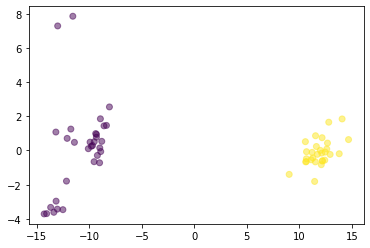

In [63]:
plt.scatter(new_pca2[:,0],new_pca2[:,1],c = DI['brand'],alpha=0.5)

In [65]:
D_pca = pca.transform(DI[DI['brand']==3].iloc[:,1:].to_numpy())
I_pca = pca.transform(DI[DI['brand']==8].iloc[:,1:].to_numpy())

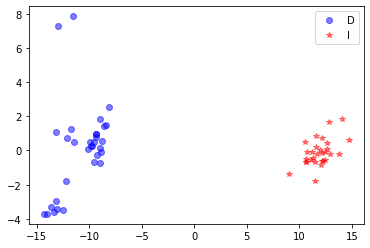

In [76]:
plt.plot(D_pca[:,0],D_pca[:,1],'ob',alpha=0.5,label='D')
plt.plot(I_pca[:,0],I_pca[:,1],'*r',alpha=0.5,label='I')
plt.legend()

### Principle components เป็นตัวแทนของข้อมูลได้ดีแค่ไหน

In [77]:
pca.explained_variance_ratio_

array([0.96201888, 0.02908381])

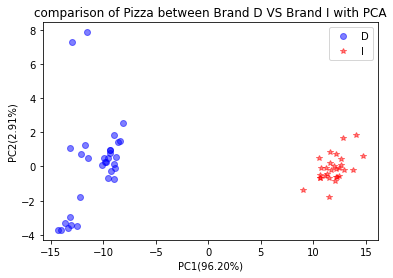

In [83]:
plt.plot(D_pca[:,0],D_pca[:,1],'ob',alpha=0.5,label='D')
plt.plot(I_pca[:,0],I_pca[:,1],'*r',alpha=0.5,label='I')
plt.legend()
plt.title('comparison of Pizza between Brand D VS Brand I with PCA')
plt.xlabel('PC1(96.20%)')
plt.ylabel('PC2(2.91%)');

component ที่เหมาะสมที่ถูกเลือกมาใช้จะครอบคลุม variance ประมาณ 80–90% ซึ่งจากที่เปรียบเทียบสารอาหารระหว่าง Brand D VS Brand I แล้ว PC1 + PC2 = 96.20+2.91 บวกกันได้เท่ากับ 99.11% ซึ่งอธิบายได้ครอบคลุม

# nndb_flat

In [116]:
import pandas as pd

In [117]:
nndb = pd.read_csv('/content/nndb_flat.csv')
nndb

,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8613,83110,Finfish and Shellfish Products,"MACKEREL,SALTED","Fish, mackerel, salted",NaN,NaN,NaN,305.0,18.50,25.10,0.00,0.00,0.0,47.0,0.410,12.00,0.0,2.38,15.0,3.300,0.190,0.020,66.0,0.100,1.40,60.0,0.000,254.0,73.4,1.10,0.052222,0.241176,5.000000,0.0,0.158667,0.0375,0.206250,0.146154,0.016667,0.055000,0.000111,0.142857,0.362857,1.334545,0.100000
8614,90240,Finfish and Shellfish Products,"SCALLOP,(BAY&SEA),CKD,STMD","Mollusks, scallop, (bay and sea), cooked, steamed",NaN,NaN,NaN,111.0,20.54,0.84,5.41,0.00,0.0,2.0,0.112,2.15,0.0,0.00,20.0,1.076,0.024,0.012,10.0,0.033,0.58,37.0,0.029,426.0,21.7,1.55,0.002222,0.065882,0.895833,0.0,0.000000,0.0500,0.067250,0.018462,0.010000,0.008333,0.000037,0.088095,0.608571,0.394545,0.140909
8615,90480,Sweets,"SYRUP,CANE","Syrup, Cane",NaN,NaN,NaN,269.0,0.00,0.00,73.14,73.20,0.0,0.0,0.000,0.00,0.0,0.00,0.0,0.100,0.060,0.130,13.0,0.020,3.60,10.0,0.000,8.0,0.7,0.19,0.000000,0.000000,0.000000,0.0,0.000000,0.0000,0.006250,0.046154,0.108333,0.010833,0.000022,0.023810,0.011429,0.012727,0.017273
8616,90560,Finfish and Shellfish Products,"SNAIL,RAW","Mollusks, snail, raw",NaN,NaN,NaN,90.0,16.10,1.40,2.00,0.00,0.0,30.0,0.130,0.50,0.0,5.00,6.0,1.400,0.120,0.010,10.0,0.400,3.50,250.0,0.000,272.0,27.4,1.00,0.033333,0.076471,0.208333,0.0,0.333333,0.0150,0.087500,0.092308,0.008333,0.008333,0.000444,0.595238,0.388571,0.498182,0.090909


In [118]:
nndb.shape  #ตรวจสอบขนาดของข้อมูลว่ามี data กี่ตัว และมีกี่ dimensions

(8618, 45)

เนื่องจาก data มี dimension มากเกินไป เราจะทดสอบดูว่า column ใด ให้ข้อมูลซ้ำกับ column อื่น แล้วลบมันออก

In [126]:
nndb1 = nndb.iloc[:,7:]
nndb1.head()

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


### ตรวจสอบว่าระหว่าง columns มี correlation กันมากน้อยแค่ไหนด้วย numpy

In [127]:
import numpy as np


In [137]:
corr = np.corrcoef(nndb1.to_numpy().T)
corr

array([[1.        , 0.11030203, 0.80679472, ..., 0.19518065, 0.05667274,
        0.11276635],
       [0.11030203, 1.        , 0.05471538, ..., 0.44460761, 0.37836917,
        0.41631538],
       [0.80679472, 0.05471538, 1.        , ..., 0.06608644, 0.03755914,
        0.02826352],
       ...,
       [0.19518065, 0.44460761, 0.06608644, ..., 1.        , 0.22368557,
        0.26657694],
       [0.05667274, 0.37836917, 0.03755914, ..., 0.22368557, 1.        ,
        0.20529859],
       [0.11276635, 0.41631538, 0.02826352, ..., 0.26657694, 0.20529859,
        1.        ]])

In [138]:
corr.shape

(38, 38)

In [139]:
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')

row = 11 column = 28 corrcoef = 1.0
row = 12 column = 29 corrcoef = 1.0
row = 13 column = 30 corrcoef = 1.0
row = 14 column = 31 corrcoef = 1.0
row = 16 column = 33 corrcoef = 1.0
row = 18 column = 34 corrcoef = 1.0
row = 28 column = 11 corrcoef = 1.0
row = 29 column = 12 corrcoef = 1.0
row = 30 column = 13 corrcoef = 1.0
row = 31 column = 14 corrcoef = 1.0
row = 33 column = 16 corrcoef = 1.0
row = 34 column = 18 corrcoef = 1.0


In [140]:
nndb1.iloc[:5,10:30]

,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA
0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625
1,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625
2,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188
3,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500
4,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375
